# Attempting to Predict Poverty

## Data Exploration and Pre-Processing

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [3]:
#Reading Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [4]:
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

In [5]:
train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

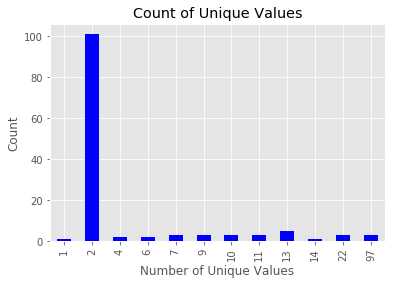

In [6]:
#mapping the distributions of unique integer values
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = "blue")
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values');

C:\Users\madat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x1440 with 0 Axes>

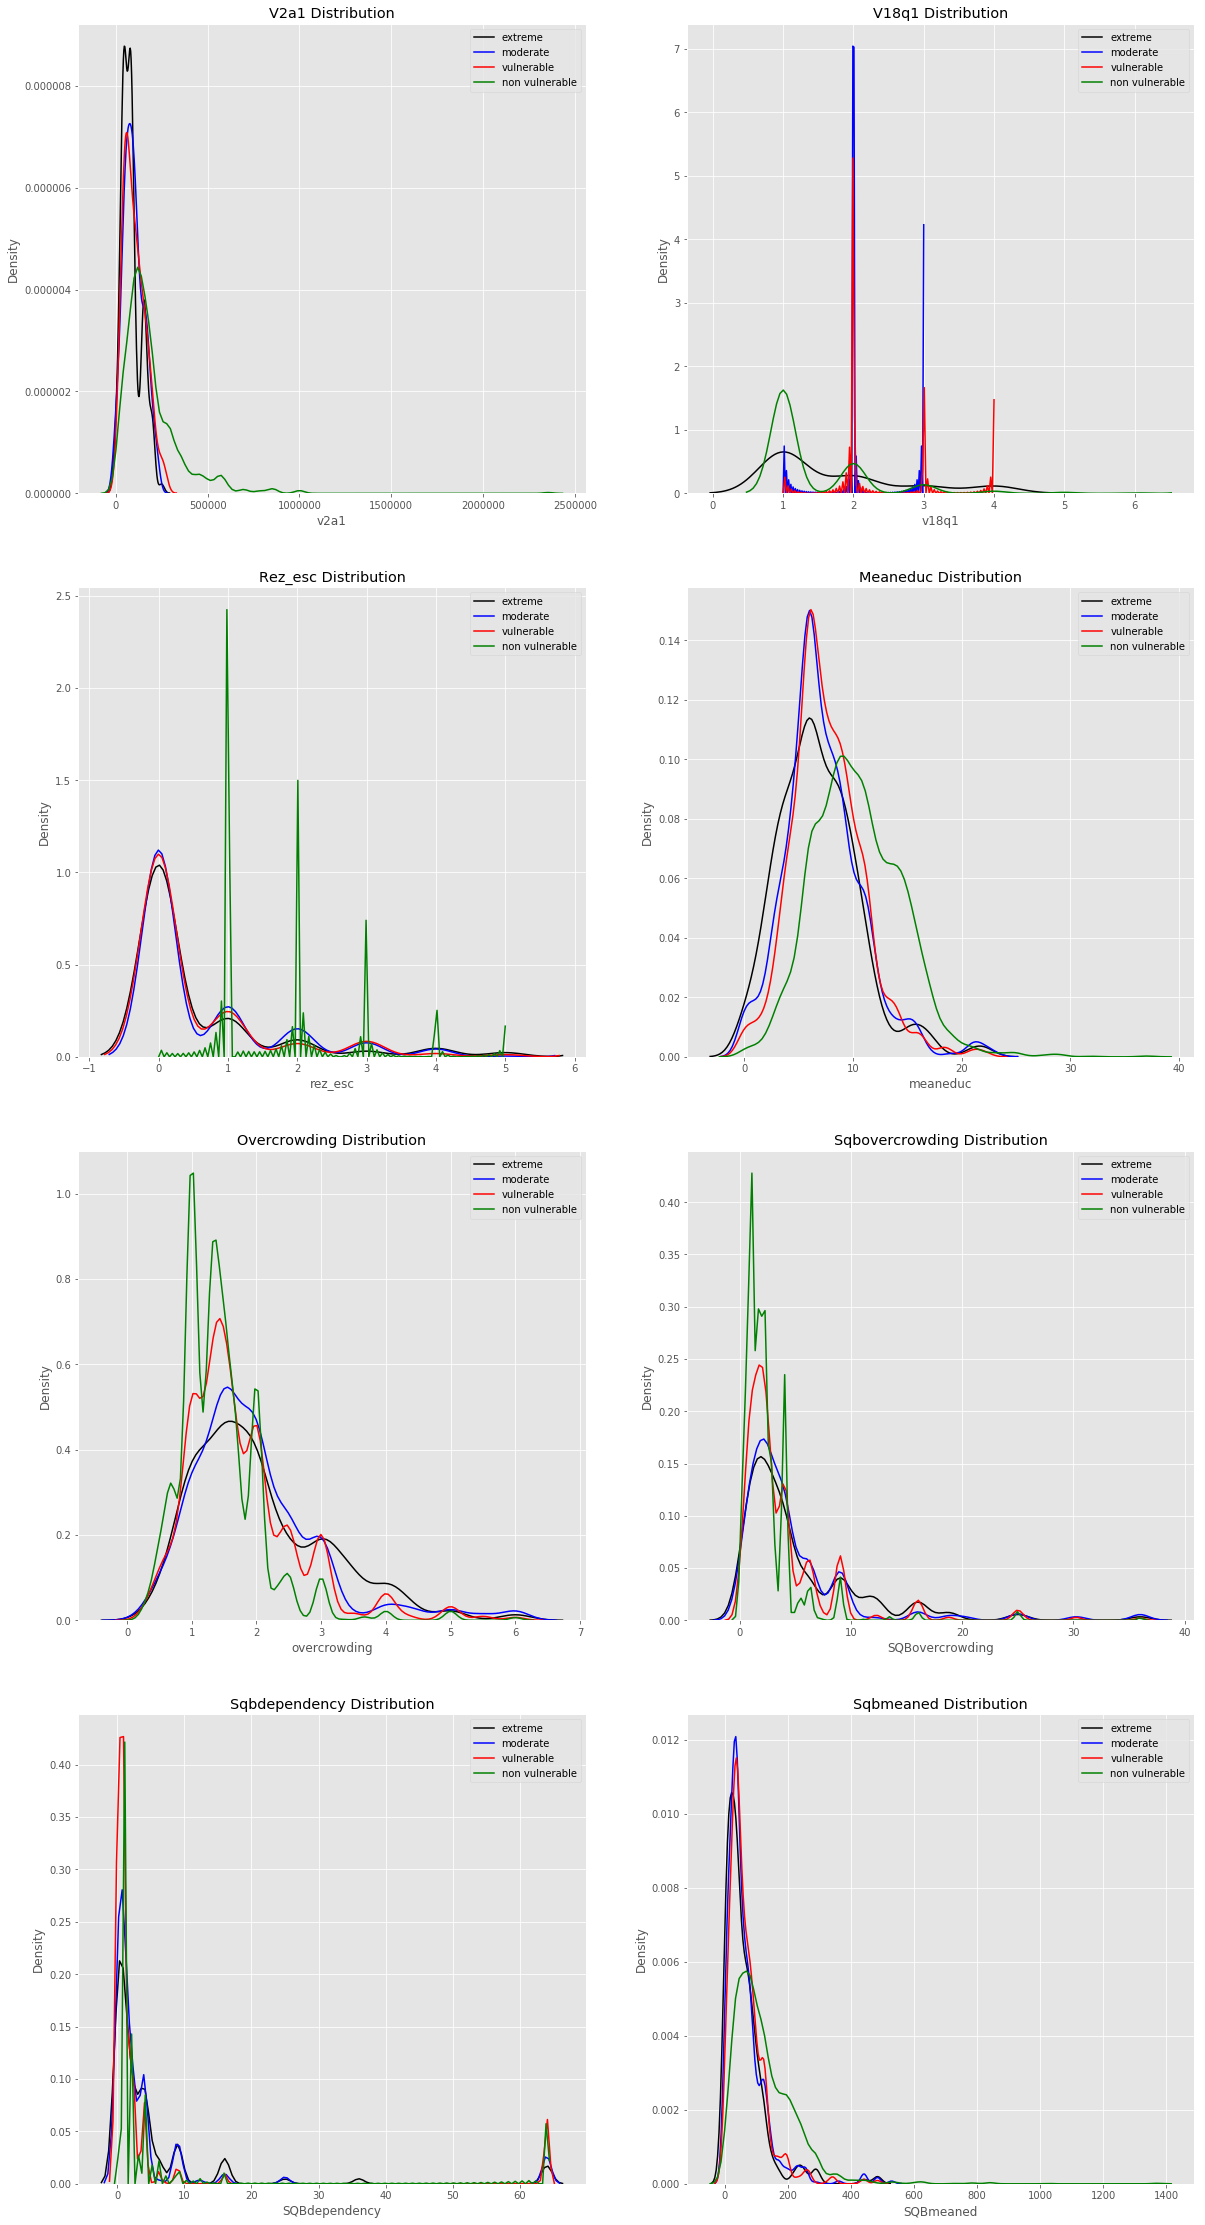

In [8]:
plt.figure(figsize=(16,20))

#mapping the distributions of continuous variables
from collections import OrderedDict

plt.figure(figsize = (20, 16))
colors = OrderedDict({1: 'black', 2: 'blue', 3: 'red', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [9]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

In [10]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

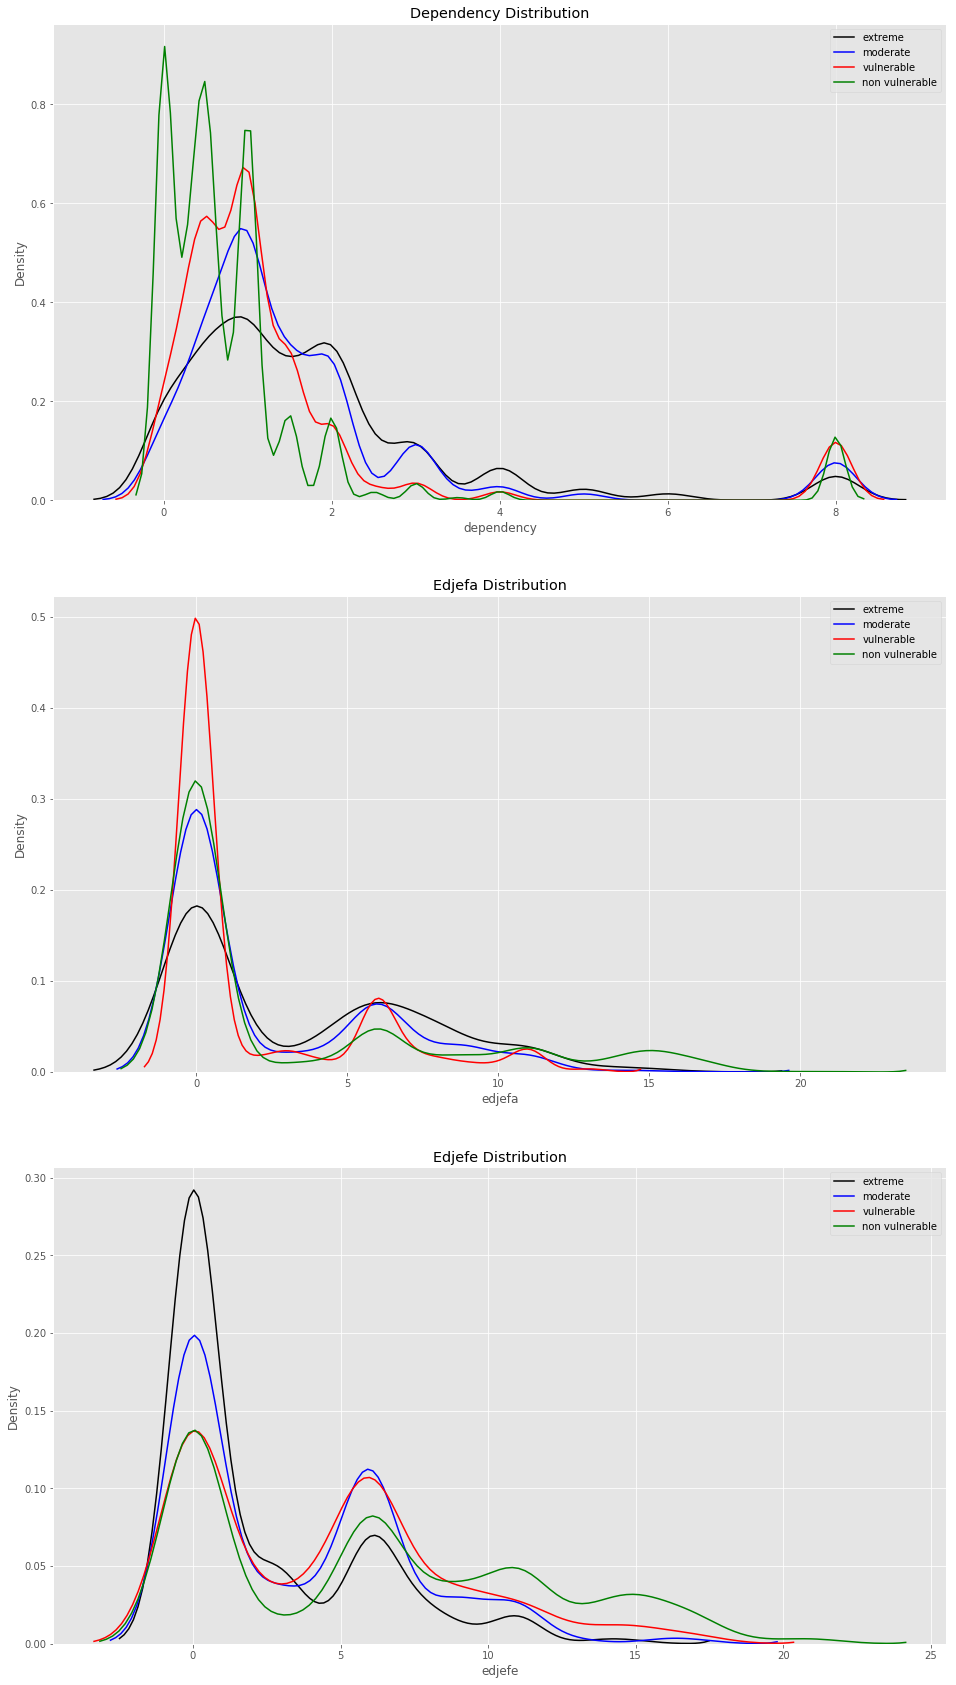

In [74]:
plt.figure(figsize = (16, 12))

#now map the distributions of these variables
i = 0
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line        
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [13]:
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

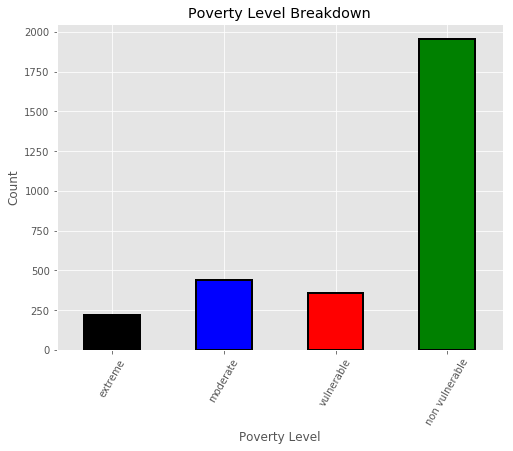

In [14]:
#Poverty level distribution


# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

#### Looking at missing values

In [18]:
#checking missing variables
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

In [19]:
#exploring the v18q1 variable
def plot_value_counts(df, col, heads_only = False):
    """Plot value counts of a column, optionally with only the heads of a household"""
    # Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.show();

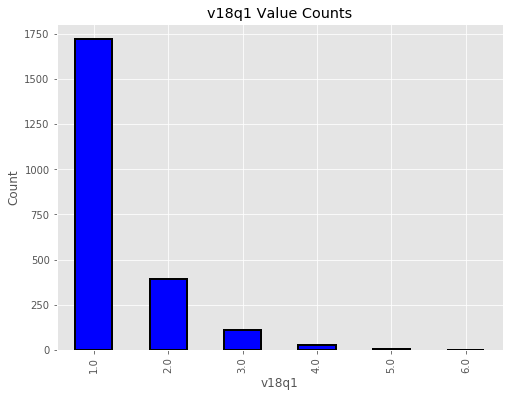

In [20]:
plot_value_counts(heads, 'v18q1')

In [21]:
#trying to understand if nan means they do not have a table
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [22]:
data['v18q1'] = data['v18q1'].fillna(0)

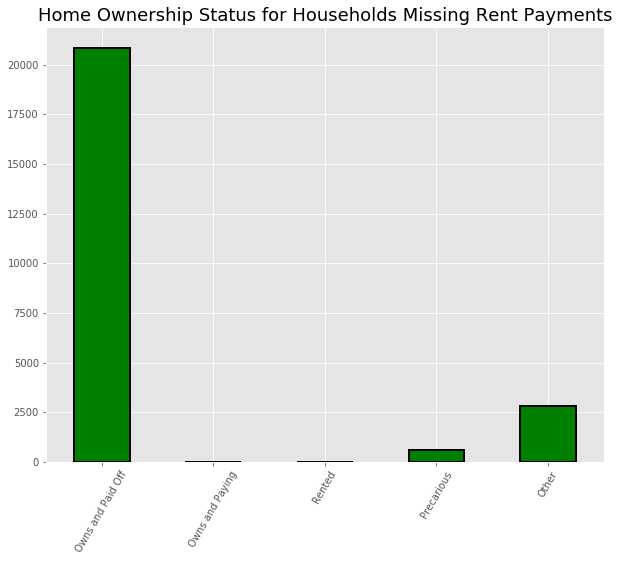

In [23]:
#now exploring v2a1
# Variables indicating home ownership
owner_variables = [x for x in data if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), owner_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [24]:
# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

In [25]:
#exploring rez_esc
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [26]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [28]:
#Since only individuals between the ages of 7 and 19 can be behind school, we can make individuals who fall out of this range equal 0
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

#### Cleaning up issues with improperly mapped data

In [15]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [16]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [17]:
#Fixing the above issues


# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


## Feature Engineering

In [29]:
#Defining Variable Categories
id_ = ['Id', 'idhogar', 'Target']
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [30]:
#Removing squared variables
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

#### Exploring household variables

In [75]:
#removing redundant household variables
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

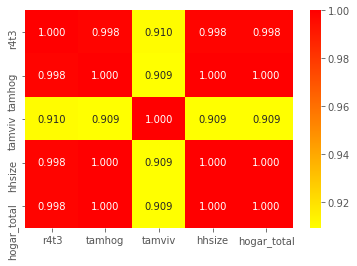

In [33]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

In [34]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

In [37]:
#creating ordinal variables
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']



elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()


heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()

# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])



heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

KeyError: "['etecho1' 'etecho2' 'etecho3'] not in index"

In [41]:
from scipy.stats import spearmanr

#calculating correlations with target variable
# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

#Pearson Correlations
pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})


#Spearman correlations
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

#print Pearson Correlations
print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

#print Spearman Correlations
print(' ')
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000
 
Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000

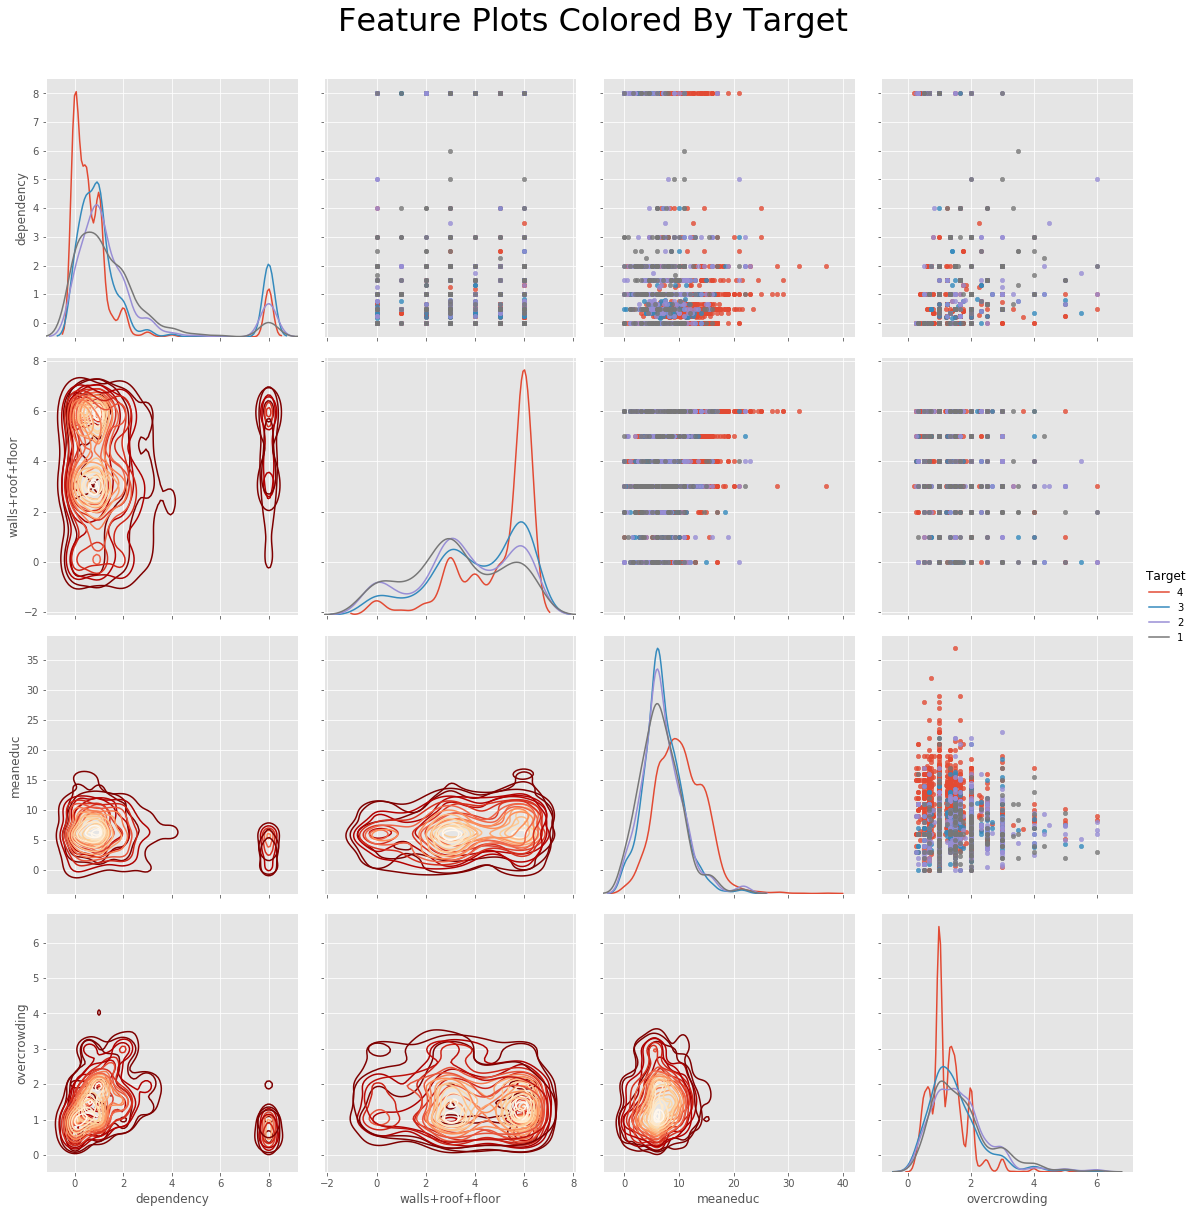

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [43]:
household_feats = list(heads.columns)

#### Exploring Individual variables

In [44]:
ind = data[id_ + ind_bool + ind_ordered]

In [45]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [46]:
ind = ind.drop(columns = 'male')

In [76]:
#creating ordinal variables
ind['escolari/age'] = ind['escolari'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']

In [51]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                ...    \
           min max sum count  std range_ min max sum count  ...     
idhogar                                                     ...     
000a08204    1   1   3     3  0.0      0   0   0   0     3  ...     
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  ...     
001845fb0    0   0   0     4  0.0      0   0   0   0     4  ...     
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...     
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...     

          escolari/age                           tech                     \
                   sum count       std    range_  min max sum count  std   
idhogar                                                                    
000a08204     0.900000     3  0.264575  0.500000    2   2   6     3  0.0   
000bce7c4     0.083333     2  0.058926  0.083333    1   1   2     2  0.0   
001845fb0     1.397906     4  0.183106  0.410931    1   1   4     4  0.0   
001ff74ca     0.421053     1       NaN  0.000000    2   2   4     2  0.0   
003123ec2     0.554348     4  0.161557  0.304348    1   1   4     4  0.0   

                  
          range_  
idhogar           
000a08204      0  
000bce7c4      0  
001845fb0      0  
001ff74ca      0  
003123ec2      0  

[5 rows x 222 columns]

In [52]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count     ...       \
idhogar                                             ...        
000a08204        0        0        0          3     ...        
000bce7c4        0        1        1          2     ...        
001845fb0        0        0        0          4     ...        
001ff74ca        0        0        0          2     ...        
003123ec2        0        0        0          4     ...        

           escolari/age-sum  escolari/age-count  escolari/age-std  \
idhogar                                                             
000a08204          0.900000                   3          0.264575   
000bce7c4          0.083333                   2          0.058926   
001845fb0          1.397906                   4          0.183106   
001ff74ca          0.421053                   1               NaN   
003123ec2          0.554348                   4          0.161557   

           escolari/age-range_  tech-min  tech-max  tech-sum  tech-count  \
idhogar                                                                    
000a08204             0.500000         2         2         6           3   
000bce7c4             0.083333         1         1         2           2   
001845fb0             0.410931         1         1         4           4   
001ff74ca             0.000000         2         2         4           2   
003123ec2             0.304348         1         1         4           4   

           tech-std  tech-range_  
idhogar                           
000a08204       0.0            0  
000bce7c4       0.0            0  
001845fb0       0.0            0  
001ff74ca       0.0            0  
003123ec2       0.0            0  

[5 rows x 222 columns]

In [53]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 105 correlated columns to remove.


In [54]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 222)


In [55]:
corrs = final.corr()['Target']

In [56]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [57]:
corrs.sort_values().dropna().tail()

instlevel8-max      0.317815
walls+roof+floor    0.332446
meaneduc            0.333652
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

## Modeling

In [58]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

C:\Users\madat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Preparing the sklearn pipeline

In [60]:
# Labels for training
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
#submission_base = test[['Id', 'idhogar']].copy()

features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

#### Comparing models

In [77]:
# Model imports
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [69]:
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27995 with std: 0.03446


In [70]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.33941 with std: 0.03336

KNN with 10 neighbors

10 Fold CV Score: 0.32359 with std: 0.03027

KNN with 20 neighbors

10 Fold CV Score: 0.30715 with std: 0.04946


In [71]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.34437 with std: 0.04049


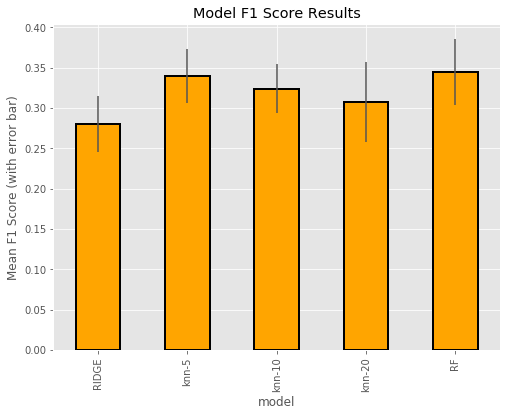

In [72]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3444 with std = 0.0405


In [66]:
import pandas as pd
model.fit(train_set, train_labels)
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.sort_values('importance', ascending=False)

feature  importance
70              meaneduc    0.025682
205              age-min    0.023257
98     phones-per-capita    0.023085
206              age-max    0.022831
211     escolari/age-max    0.022387
201         escolari-max    0.022270
212     escolari/age-sum    0.021373
202         escolari-sum    0.020740
213     escolari/age-std    0.020445
208              age-std    0.019857
67            dependency    0.019259
207              age-sum    0.019222
210     escolari/age-min    0.018655
214  escolari/age-range_    0.018609
209           age-range_    0.017188
203         escolari-std    0.016812
95      walls+roof+floor    0.016258
100     rooms-per-capita    0.016227
200         escolari-min    0.015716
71          overcrowding    0.014124
68                edjefe    0.012022
172       instlevel2-sum    0.011559
204      escolari-range_    0.011227
191       instlevel8-sum    0.011104
72                 rooms    0.010540
84             hogar_nin    0.009622
88          qmobilephone    0.009225
101      rent-per-capita    0.008978
93                  roof    0.008255
69                edjefa    0.008066
..                   ...         ...
193       instlevel9-min    0.000035
91          elec-missing    0.000024
15             pisonatur    0.000013
12            paredother    0.000010
21             techootro    0.000008
187       instlevel7-min    0.000002
217             tech-std    0.000000
14             pisoother    0.000000
43             elimbasu5    0.000000
44             elimbasu6    0.000000
106          v18q-range_    0.000000
198          rez_esc-min    0.000000
147      parentesco5-min    0.000000
164     parentesco12-min    0.000000
161     parentesco11-min    0.000000
159     parentesco10-min    0.000000
156      parentesco9-min    0.000000
154      parentesco8-min    0.000000
152      parentesco7-min    0.000000
149      parentesco6-min    0.000000
144      parentesco4-min    0.000000
197   mobilephone-range_    0.000000
141      parentesco3-min    0.000000
138      parentesco2-min    0.000000
136      parentesco1-max    0.000000
185       instlevel6-min    0.000000
115     estadocivil1-min    0.000000
105             v18q-std    0.000000
196      mobilephone-std    0.000000
218          tech-range_    0.000000

[219 rows x 2 columns]